# Testing Distributions

This notebook illustrates basic descriptive stats (means, std, skewness, kurtosis), histograms, the Bera-Jarque test (of normality), Q-Q plots and tests of the empirical distribution function (Kolmogorov-Smirnov).

## Load Packages

In [1]:
using Dates, DelimitedFiles, Distributions, StatsBase
                         
include("jlFiles/printmat.jl")
include("jlFiles/printTable.jl")

printTable2

In [2]:
using Plots

#pyplot(size=(600,400))             #pyplot() or gr()
gr(size=(480,320))
default(fmt = :svg)

# Load Data from a csv File

In [3]:
xx  = readdlm("Data/FFdFactors.csv",',',skipstart=1)
x   = xx[:,2]            #equity market excess returns
xx  = nothing

T   = size(x,1)
println("Sample size: $T")

Sample size: 15356


## Basic Desciptive Statistics and a Histogram

The next few cells estimate means, standard deviations, covariances and correlations of the variables `Rme` (US equity market excess return) and `Re` (excess returns for a segment of the market, small growth firms). 

In [4]:
μ = mean(x)
σ = std(x) 
(xmin,xmax) = extrema(x)

printblue("Basic descriptive stats:")
xx = [μ,σ,xmin,xmax]
printTable(xx,[""],["μ","σ","min","max"])

Basic descriptive stats:
             
μ       0.026
σ       0.955
min   -17.440
max    11.350



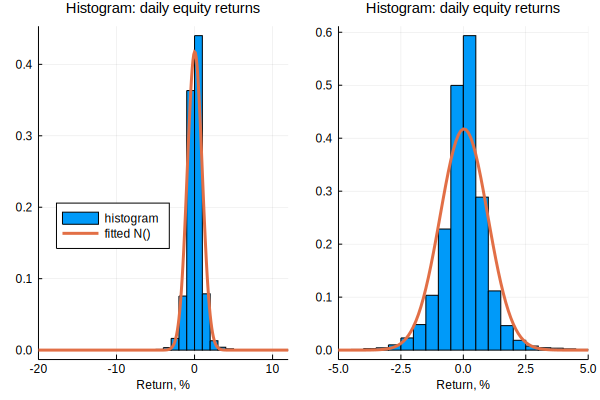

In [5]:
xGrid = -20:0.1:12
pdfX  = pdf.(Normal(μ,σ),xGrid) #"Distributions" wants σ, not σ^2                                       

p1 = histogram(x,bins = -20:1:12,normalized=true,label="histogram")     #normalized to have area=1
plot!(xGrid,pdfX,linewidth=3,label="fitted N()")
plot!(legend=:left)
plot!(xlim=(-20,12))
title!("Histogram: daily equity returns",titlefont=font(10))
xlabel!("Return, %",guidefont=font(8))
ylabel!("")

p2 = histogram(x,bins = -5:0.5:5,normalized=true,legend=false) 
plot!(xGrid,pdfX,linewidth=3,legend=false)
plot!(xlim=(-5,5))
title!("Histogram: daily equity returns",titlefont=font(10))
xlabel!("Return, %",guidefont=font(8))
ylabel!("")

pAll = plot(p1,p2,layout=(1,2),size=(600,400))                  #set up subplots    

# Skewness, Kurtosis and the Bera-Jarque Test

In [6]:
xStd     = (x .- μ)./σ               #first normalize to a zero mean, unit std variable
skewness = mean(xStd.^3)
kurtosis = mean(xStd.^4)

BJ     = (T/6)*skewness.^2 + (T/24)*(kurtosis.-3).^2  #chi2(2)
#pvalBJ = 1 .- cdf.(Chisq(2),BJ)

printblue("More descriptive stats:")
xx = [skewness,kurtosis,BJ]
printTable(xx,[""],["Skewness","Kurtosis","Bera-Jarque"],width=12)

More descriptive stats:
                       
Skewness         -0.519
Kurtosis         19.166
Bera-Jarque  167896.608



# Q-Q Plot

The Q-Q plot shows the empirical quantiles against the theoretical quantiles (possible from an estimated distribution). If the theoretical distribution is a good fit to the data, then the results should cluster closely around a 45 degree line.

In [7]:
pval1 = 0.01:0.01:0.99                          #quantiles 0.01 to 0.99, to QQ plot
pval2 = [0.001:0.001:0.009;0.991:0.001:0.999]   #extreme quantiles
    
qEmp1 = quantile(x,pval1)                       #empirical quantiles
qEmp2 = quantile(x,pval2) 
qN1   = quantile.(Normal(μ,σ),pval1)            #quantiles of N()
qN2   = quantile.(Normal(μ,σ),pval2)            #quantiles of N()

println()

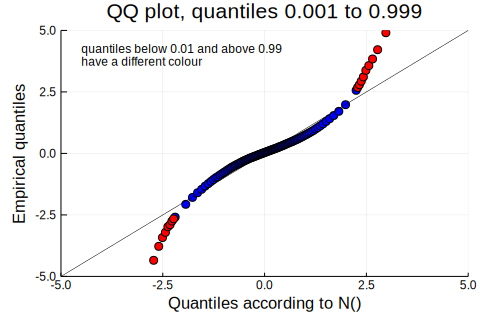

In [8]:
p1 = scatter(qN1,qEmp1,color=:blue,legend=false)
scatter!(qN2,qEmp2,color=:red,legend=false)
plot!([-5,5],[-5,5],color=:black,linewidth=0.5)
plot!(xlim=(-5,5),ylim=(-5,5))
title!("QQ plot, quantiles 0.001 to 0.999")
xlabel!("Quantiles according to N()")
ylabel!("Empirical quantiles")
txt = text("quantiles below 0.01 and above 0.99\nhave a different colour",8,:left)
annotate!(-4.5,4,txt)

# Empirical Distribution Function and the Kolmogorov-Smirnov Test

The empirical distribution function (edf) shows the empirical quantiles. The K-S test is designed to show whether the edf differs from a theoretical (possibly estimated) cdf.

In [9]:
xSorted = sort(x)

edfFn = ecdf(xSorted)                  

edfEmp = edfFn(xGrid)                   #just for xGrid, for plotting
cdfN   = cdf.(Normal(μ,σ),xGrid)

println()

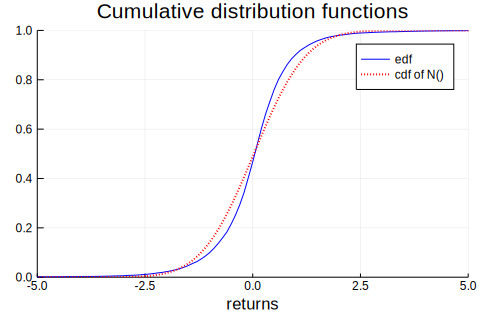

In [10]:
plot(xGrid,edfEmp,label="edf",color=:blue)
plot!(xGrid,cdfN,label="cdf of N()",color=:red,line=(:dot,2))
plot!(xlim=(-5,5),ylim=(0,1))
title!("Cumulative distribution functions")
xlabel!("returns")
ylabel!("")

In [11]:
edfEmp2 = edfFn(xSorted)                 #for all x values
cdfN2   = cdf.(Normal(μ,σ),xSorted)

D = maximum(abs.(edfEmp2-cdfN2))         #Kolomogorov-Smirnov statistics

printblue("Kolmogor-Smirnov test:")
println("      D     sqrt(T)*D    5% critval")
printlnPs(D,sqrt(T)*D,1.36)               #cf 5% critical value of 1.36

Kolmogor-Smirnov test:
      D     sqrt(T)*D    5% critval
     0.076     9.474     1.360
